In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle as p
import warnings
warnings.filterwarnings('ignore')

# **1.Loading the data**

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Create a DataFrame from the data and target variables
data_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target_df = pd.DataFrame(data=diabetes.target, columns=['target'])

# Concatenate the data and target DataFrames horizontally
df = pd.concat([data_df, target_df], axis=1)

# Now you have a DataFrame 'df' containing both features and target variable
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
rows, columns = df.shape
print(f'Rows:{rows} , Columns:{columns}')

Rows:442 , Columns:11


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# **2.EDA**

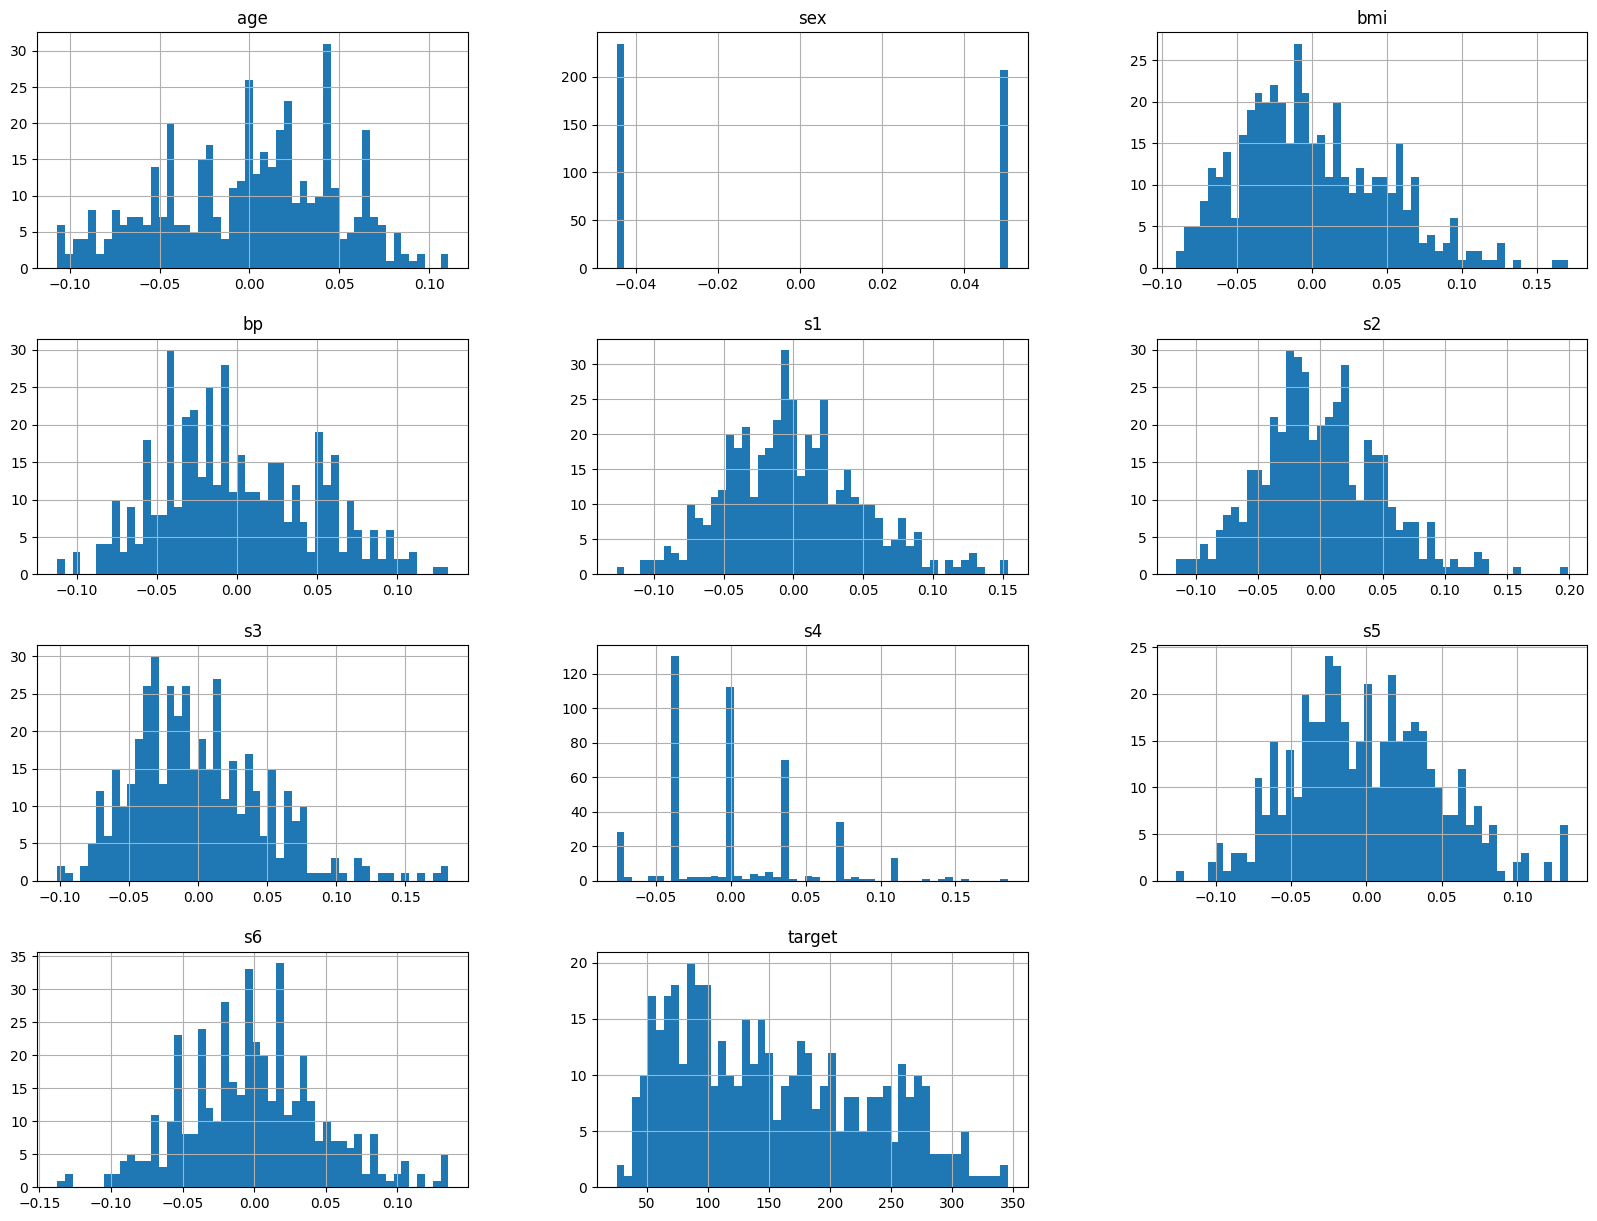

In [8]:
df.hist(bins=50,figsize=(20,15));

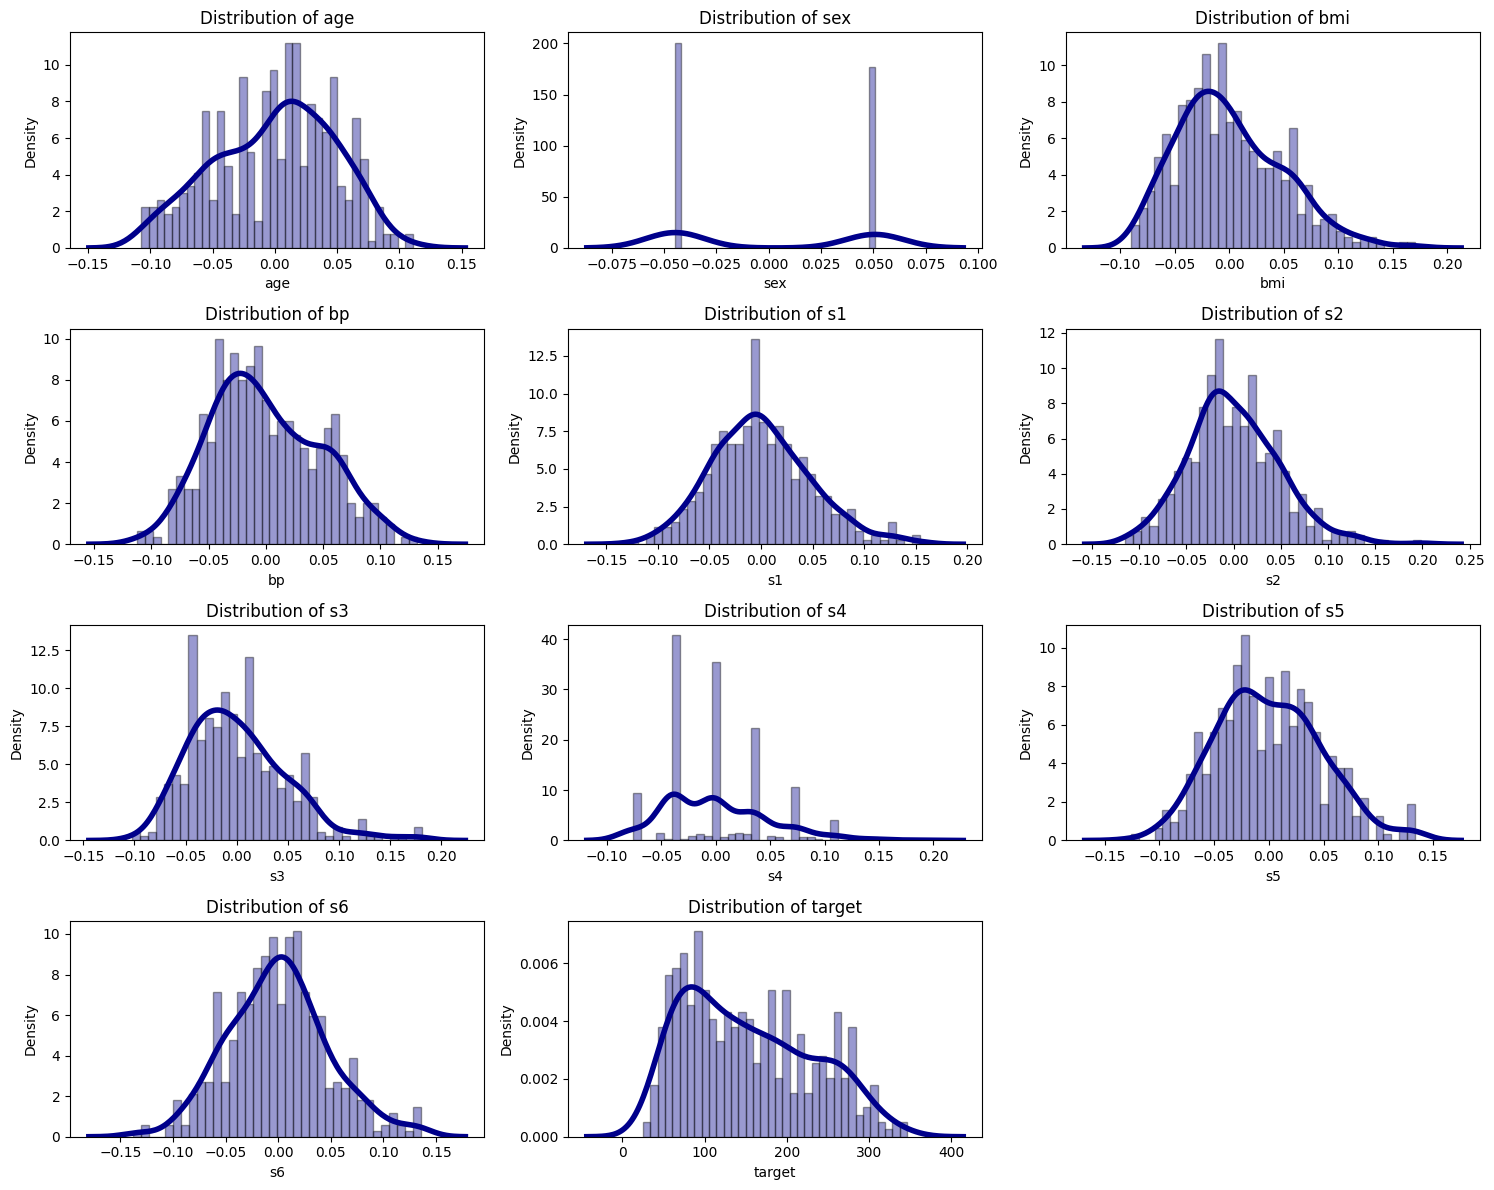

In [9]:
columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.distplot(df[col], hist=True, kde=True,
                 bins=int(180/5), color='darkblue',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4},
                 ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
fig.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

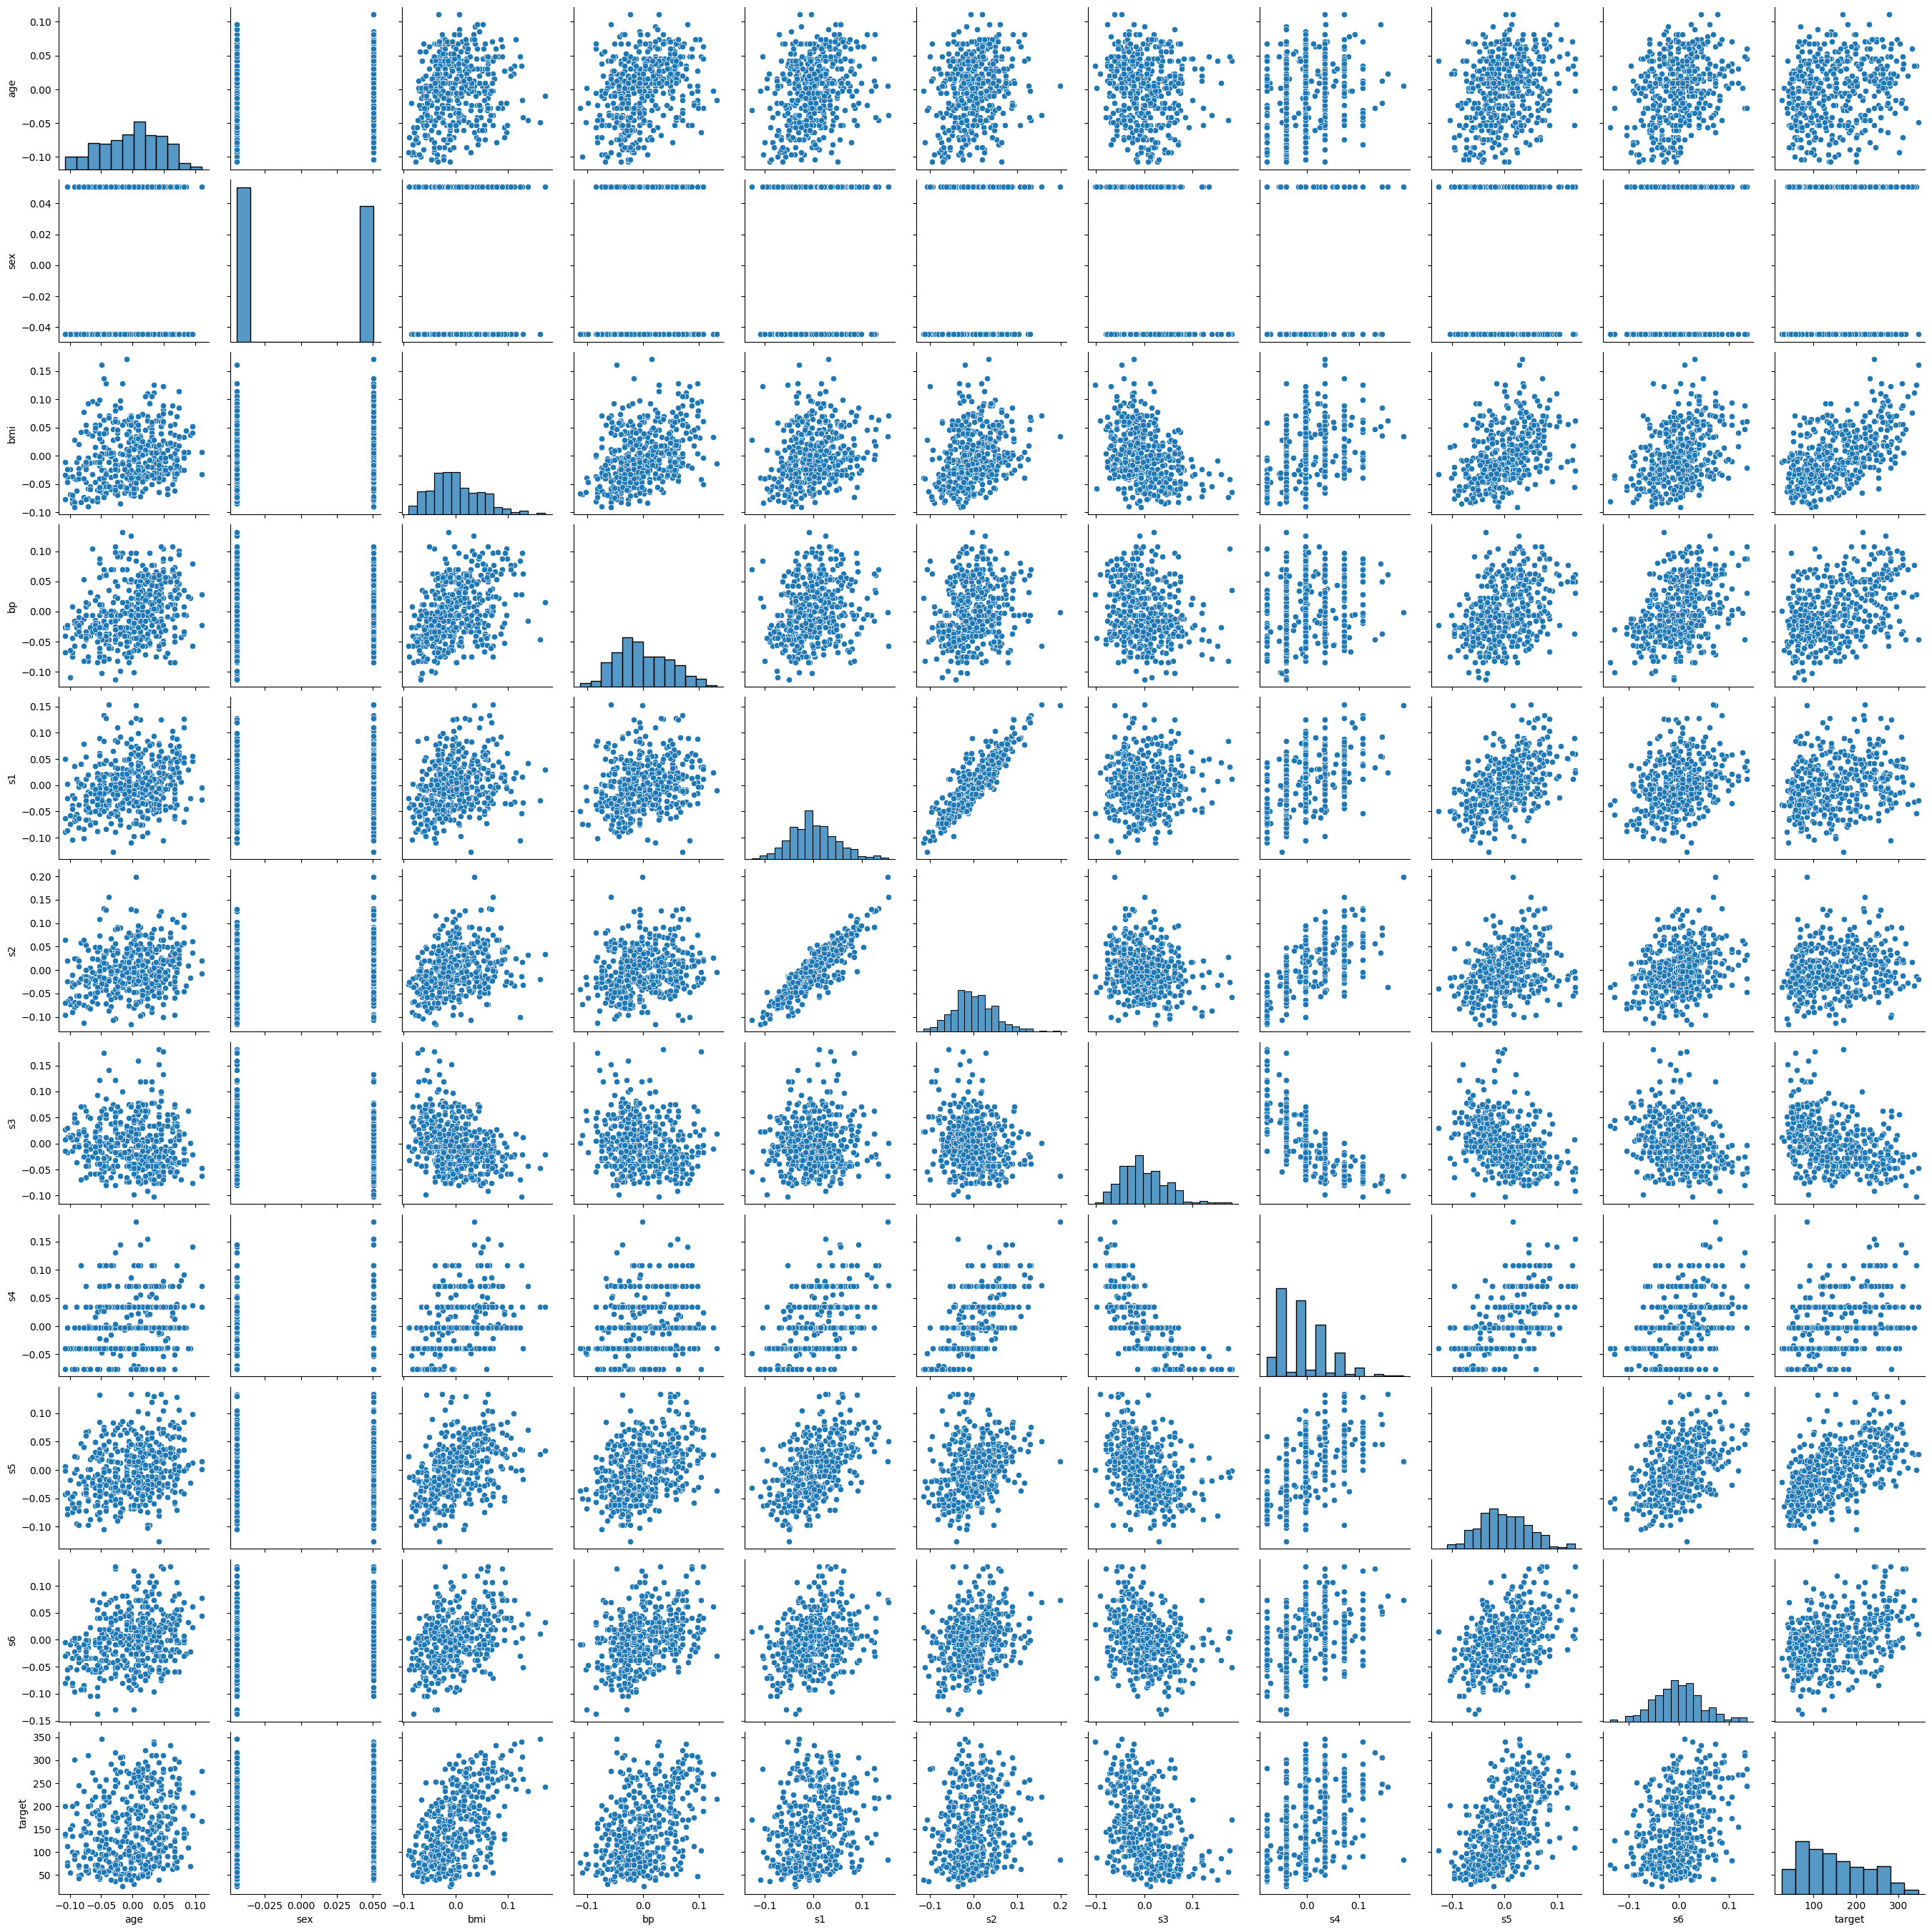

In [10]:
plt.figure(figsize=(15, 15))
sns.pairplot(df);

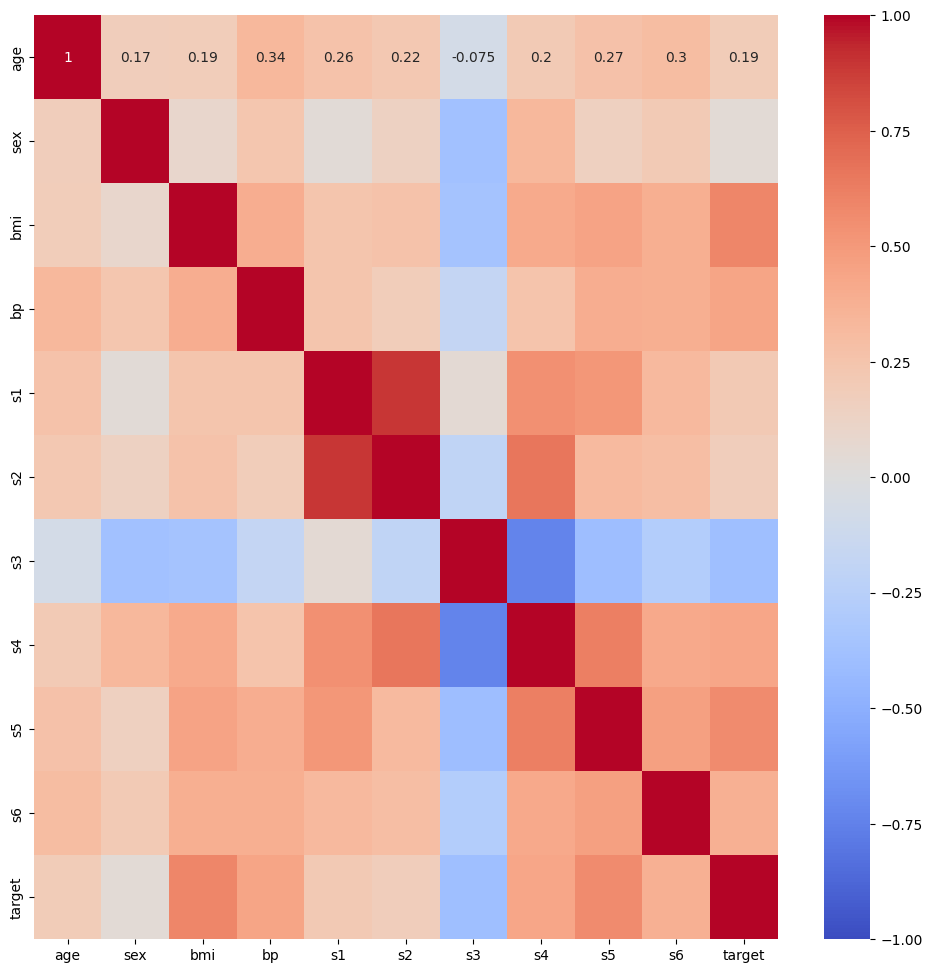

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

# **3.Building Regression Model**

In [12]:
X = df.drop("target", axis=1)  
y = df["target"]  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train) 
        y_test_pred = model.predict(X_test)
        
        # Train set performance
        model_train_mae = mean_absolute_error(y_train, y_train_pred) 
        model_train_mse = mean_squared_error(y_train, y_train_pred)
        model_train_rmse = np.sqrt(model_train_mse)
        model_train_r2 = r2_score(y_train, y_train_pred)
        
        print(f"Train set performance for {model_name}:")
        print(f"MAE: {model_train_mae}")
        print(f"MSE: {model_train_mse}")
        print(f"RMSE: {model_train_rmse}")
        print(f"R2 Score: {model_train_r2}\n")
        
        # Test set performance
        model_test_mae = mean_absolute_error(y_test, y_test_pred) 
        model_test_mse = mean_squared_error(y_test, y_test_pred)
        model_test_rmse = np.sqrt(model_test_mse)
        model_test_r2 = r2_score(y_test, y_test_pred)
        
        print(f"Test set performance for {model_name}:")
        print(f"MAE: {model_test_mae}")
        print(f"MSE: {model_test_mse}")
        print(f"RMSE: {model_test_rmse}")
        print(f"R2 Score: {model_test_r2}\n")
        
        print("-" * 50 + "\n")


models = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'RandomForestRegressor': RandomForestRegressor()
}

evaluate_models(models, X_train, X_test, y_train, y_test)

Train set performance for Linear Regression:
MAE: 43.483503523980396
MSE: 2868.549702835577
RMSE: 53.558843367230935
R2 Score: 0.5279193863361498

Test set performance for Linear Regression:
MAE: 42.79409467959994
MSE: 2900.1936284934814
RMSE: 53.85344583676593
R2 Score: 0.4526027629719195

--------------------------------------------------

Train set performance for Logistic Regression:
MAE: 58.78186968838527
MSE: 5291.008498583569
RMSE: 72.73931879378284
R2 Score: 0.12925248028893965

Test set performance for Logistic Regression:
MAE: 61.640449438202246
MSE: 5691.91011235955
RMSE: 75.44474873945535
R2 Score: -0.07431994826369315

--------------------------------------------------

Train set performance for RandomForestRegressor:
MAE: 17.429943342776202
MSE: 471.0846609065156
RMSE: 21.704484810898315
R2 Score: 0.9224730407883325

Test set performance for RandomForestRegressor:
MAE: 43.803820224719104
MSE: 2919.802130337079
RMSE: 54.03519344221022
R2 Score: 0.4489017550026616

--------

# **4.Hyperparameter Tuning**

In [15]:
rf_params = {
    
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [16]:
randomcv_models = [
    ('RF',RandomForestRegressor(), rf_params),
]

In [17]:
randomcv_models

[('RF',
  RandomForestRegressor(),
  {'n_estimators': [100, 200, 300, 400, 500],
   'max_depth': [None, 10, 20, 30, 40, 50],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'bootstrap': [True, False]})]

In [18]:
model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f'------------- Best Params for {model_name} ----------------')
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4

[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf

In [19]:
rf_model = RandomForestRegressor(n_estimators=500,
                                 min_samples_split=5, 
                                 min_samples_leaf=1, 
                                 max_depth=None, 
                                 bootstrap=True)
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=500)

In [20]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [21]:
# Train set performance
y_pred_train = rf_model.predict(X_train)
model_train_mae = mean_absolute_error(y_train, y_pred_train) 
model_train_mse = mean_squared_error(y_train, y_pred_train)
model_train_rmse = np.sqrt(model_train_mse)
model_train_r2 = r2_score(y_train, y_pred_train)
        
print(f"Train set performance for {model_name}:")
print(f"MAE: {model_train_mae}")
print(f"MSE: {model_train_mse}")
print(f"RMSE: {model_train_rmse}")
print(f"R2 Score: {model_train_r2}\n")
        
# Test set performance
y_pred_test = rf_model.predict(X_test)
model_test_mae = mean_absolute_error(y_test, y_pred_test) 
model_test_mse = mean_squared_error(y_test, y_pred_test)
model_test_rmse = np.sqrt(model_test_mse)
model_test_r2 = r2_score(y_test, y_pred_test)
        
print(f"Test set performance for {model_name}:")
print(f"MAE: {model_test_mae}")
print(f"MSE: {model_test_mse}")
print(f"RMSE: {model_test_rmse}")
print(f"R2 Score: {model_test_r2}\n")
        
print("-" * 50 + "\n")

Train set performance for RF:
MAE: 20.153040957138558
MSE: 632.2193256337301
RMSE: 25.143971954202662
R2 Score: 0.8959549186404931

Test set performance for RF:
MAE: 44.170443213091524
MSE: 2940.619466609605
RMSE: 54.227478888563546
R2 Score: 0.4449725854996638

--------------------------------------------------



In [22]:
train_actual_vs_pred = pd.DataFrame({'Actual Train set': y_train, 
                                     'Predicted Train set' : y_pred_train})
train_actual_vs_pred

,Actual Train set,Predicted Train set
17,144.0,159.981529
66,150.0,143.016461
137,280.0,250.734526
245,125.0,109.927714
31,59.0,63.675125
...,...,...
106,134.0,120.513622
270,202.0,205.400326
348,148.0,132.405267
435,64.0,79.439940


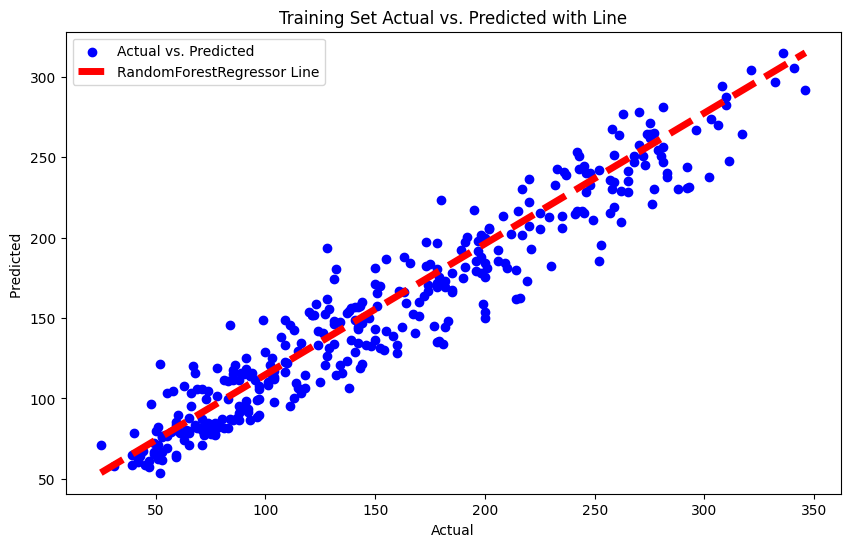

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train , color='blue', label='Actual vs. Predicted')
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.plot([min(y_train), max(y_train)], [min(y_pred_train ), max(y_pred_train )], color='red', linestyle='--', linewidth=5, label='RandomForestRegressor Line')
plt.title("Training Set Actual vs. Predicted with Line")
plt.legend()
plt.show()

In [24]:
test_actual_vs_pred = pd.DataFrame({'Actual Test set': y_test , 
                                    'Predicted Test set' : y_pred_test,})
test_actual_vs_pred

,Actual Test set,Predicted Test set
287,219.0,141.061208
211,70.0,174.787622
72,202.0,156.550522
321,230.0,253.168113
73,111.0,113.154455
...,...,...
255,153.0,86.367839
90,98.0,73.024133
57,37.0,93.817565
391,63.0,74.515145


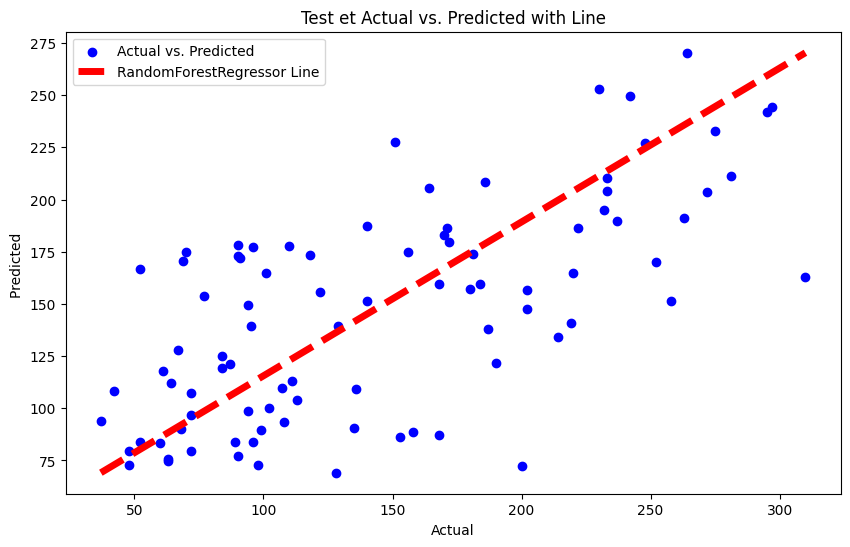

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test , color='blue', label='Actual vs. Predicted')
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.plot([min(y_test), max(y_test)], [min(y_pred_test ), max(y_pred_test )], color='red', linestyle='--', linewidth=5, label='RandomForestRegressor Line')
plt.title("Test et Actual vs. Predicted with Line")
plt.legend()
plt.show()

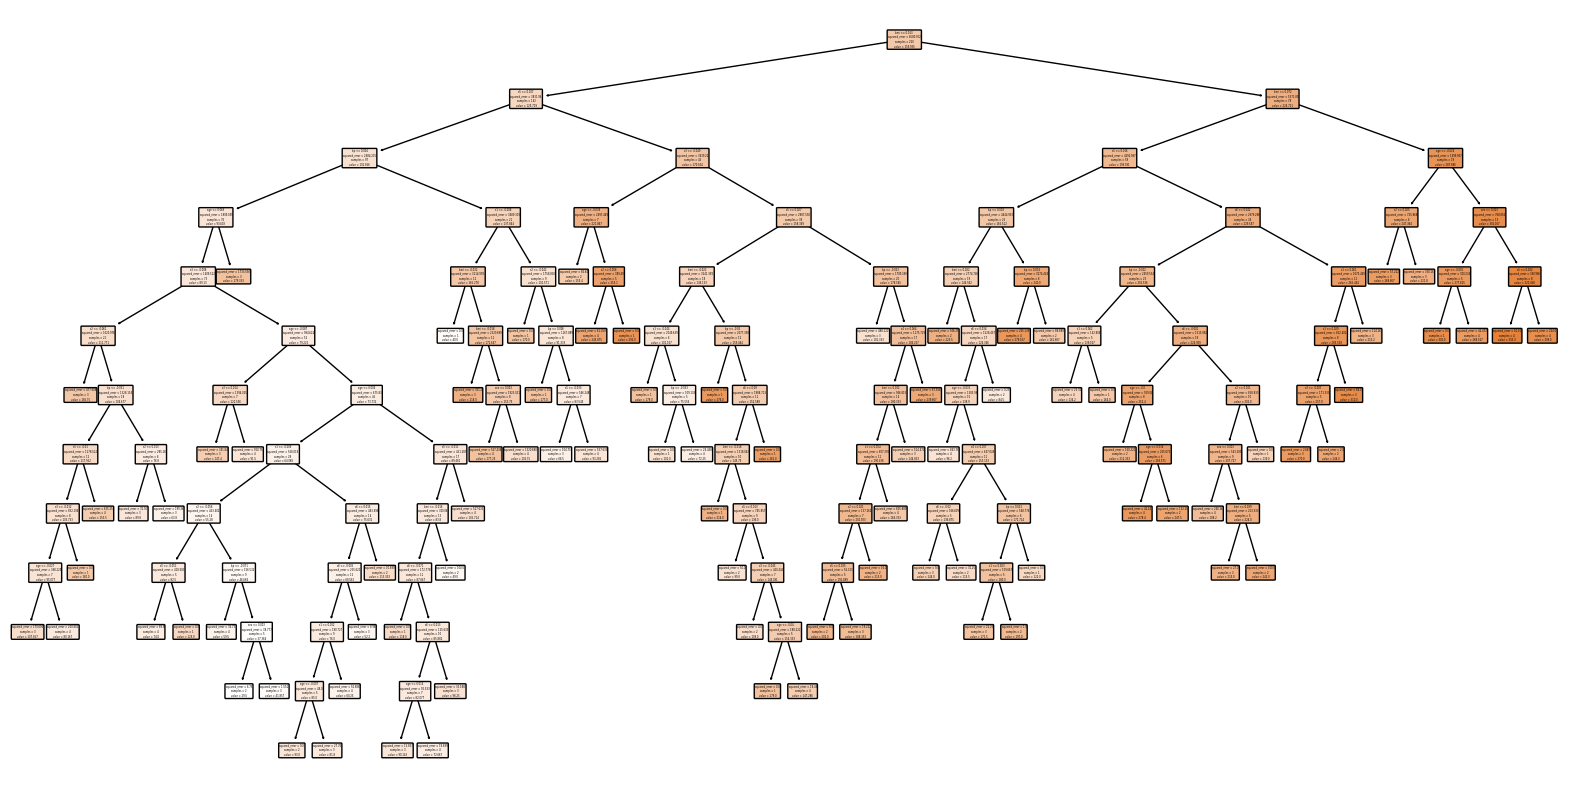

In [26]:
# Get the final tree (last estimator in the forest)
final_tree = rf_model.estimators_[-1]

# Get a list of feature names from the DataFrame
feature_names = X_train.columns.tolist()

# Plot the final tree
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=feature_names, filled=True, rounded=True)
plt.show()

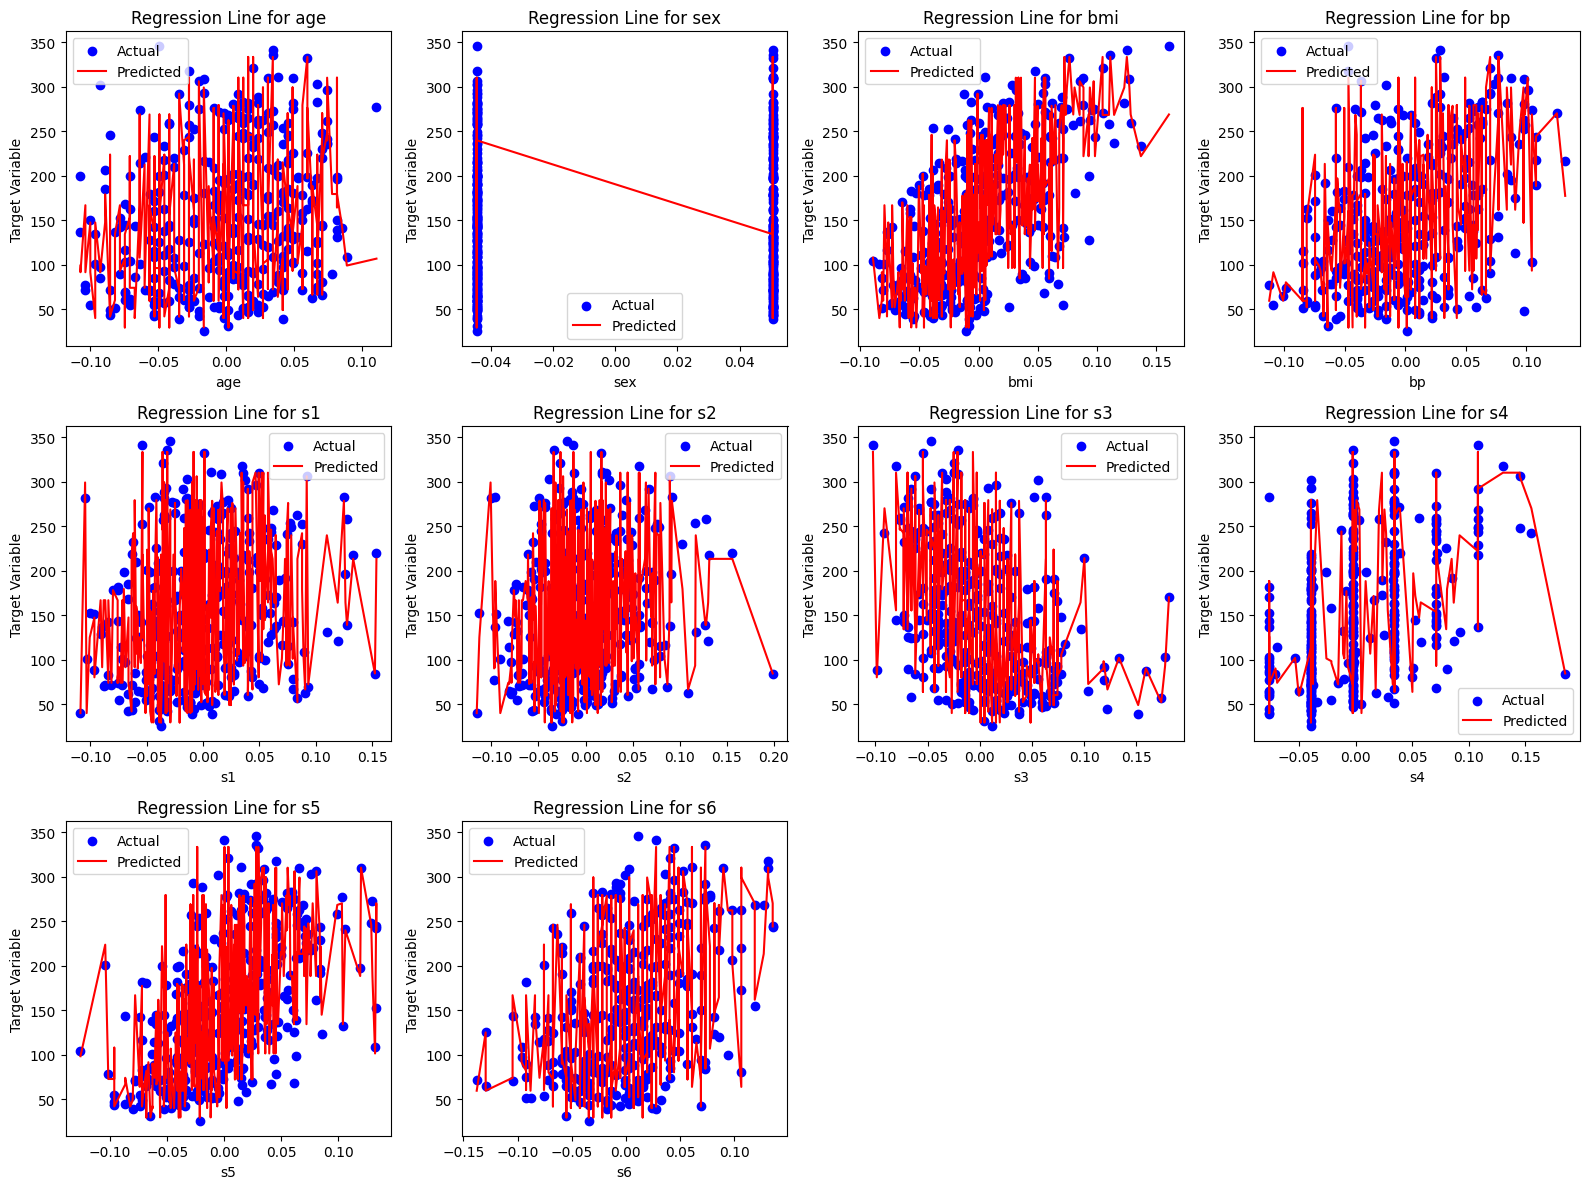

In [27]:
def plot_regression_lines(rf_model, X_train, y_train):
    # Get the number of features
    num_features = X_train.shape[1]

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.5)

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    # Iterate over each feature
    for i, feature_name in enumerate(X_train.columns):
        # Choose a tree from the forest (e.g., the first tree)
        chosen_tree = rf_model.estimators_[-1]

        # Find the index of the feature in the columns
        feature_index = X_train.columns.get_loc(feature_name)

        # Extract the feature and target values
        X_feature = X_train.iloc[:, feature_index]
        y_pred_feature = chosen_tree.predict(X_train)

        # Sort the feature values for plotting
        sorted_indices = X_feature.argsort()
        X_feature_sorted = X_feature.iloc[sorted_indices]
        y_pred_feature_sorted = y_pred_feature[sorted_indices]

        # Plot the regression line on the current subplot
        ax = axes[i]
        ax.scatter(X_feature, y_train, color='blue', label='Actual')
        ax.plot(X_feature_sorted, y_pred_feature_sorted, color='red', label='Predicted')
        ax.set_xlabel(feature_name)
        ax.set_ylabel('Target Variable')
        ax.set_title(f'Regression Line for {feature_name}')
        ax.legend()

    # Hide empty subplots, if any
    for i in range(num_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


plot_regression_lines(rf_model, X_train, y_train)

# **5.Saving the Regression Model**

In [28]:
filename = "rf_model.pickle"
# save model
p.dump(rf_model, open(filename, "wb"))

In [29]:
loaded_model = p.load(open(filename, "rb"))
y_pred = loaded_model.predict(X_train)

model_train_mae = mean_absolute_error(y_train, y_pred) 
model_train_mse = mean_squared_error(y_train, y_pred)
model_train_rmse = np.sqrt(model_train_mse)
model_train_r2 = r2_score(y_train, y_pred)

print(f"MAE: {model_test_mae}")
print(f"MSE: {model_test_mse}")
print(f"RMSE: {model_test_rmse}")
print(f"R2 Score: {model_test_r2}\n")

MAE: 44.170443213091524
MSE: 2940.619466609605
RMSE: 54.227478888563546
R2 Score: 0.4449725854996638



In [30]:
loaded_model.score(X_train,y_train)

0.8959549186404931

In [31]:
# Assuming these are the preprocessing factors from the original dataset
mean_factors = np.array([48.51809954751131, 1.4683267118863047, 26.37579185520364, 94.64701357466063, 189.14027149321267, 49.788361490841054, 207.63243531202435, 4.070248858447488, 91.26018099358693, 4.641543612608034])
std_factors = np.array([13.109027717057796, 0.49956142697883553, 4.418121781769573, 13.831283589584983, 34.60805195184082, 11.343821437921673, 26.252347638186045, 0.2926947894894721, 16.97690652188136, 0.5228598213602433])

# Define the StandardScaler
scaler = StandardScaler()
scaler.mean_ = mean_factors
scaler.scale_ = std_factors * np.sqrt(442)

# Test inputs
test_inputs = [
    [40, 0, 25.5, 120, 150, 40, 45, 1.5, 0.8, 120],
    [50, 1, 30.0, 130, 140, 35, 50, 1.7, 1.0, 130],
    [45, 0, 28.0, 125, 145, 45, 40, 1.6, 0.9, 125],
    [55, 1, 27.5, 135, 155, 50, 55, 1.8, 1.2, 135],
    [60, 0, 26.0, 140, 160, 55, 60, 2.0, 1.5, 140]
]

# Predict disease progression
for input_data in test_inputs:
    # Scale the input data
    scaled_input = scaler.transform([input_data])
    
    # Use the model to make predictions
    prediction = loaded_model.predict(scaled_input)
    
    print(f"Input: {scaled_input[0]}, Predicted disease progression: {prediction[0]:.2f}")

Input: [-3.09073019e-02 -1.39804988e-01 -9.42870580e-03  8.71877566e-02
 -5.37942114e-02 -4.10430365e-02 -2.94664546e-01 -4.17685163e-01
 -2.53447353e-01  1.04942893e+01], Predicted disease progression: 123.53
Input: [ 5.37696753e-03 -4.45911730e-02  3.90179380e-02  1.21577298e-01
 -6.75381659e-02 -6.20082595e-02 -2.85605327e-01 -3.85183629e-01
 -2.52887002e-01  1.14040006e+01], Predicted disease progression: 170.26
Input: [-0.01276517 -0.13980499  0.0174861   0.10438253 -0.06066619 -0.02007781
 -0.30372376 -0.4014344  -0.25316718 10.94914493], Predicted disease progression: 176.43
Input: [ 2.35191023e-02 -4.45911730e-02  1.21031359e-02  1.38772068e-01
 -4.69222341e-02  8.87409712e-04 -2.76546109e-01 -3.68932861e-01
 -2.52326651e-01  1.18588562e+01], Predicted disease progression: 172.63
Input: [ 4.16612370e-02 -1.39804988e-01 -4.04574537e-03  1.55966839e-01
 -4.00502568e-02  2.18526328e-02 -2.67486891e-01 -3.36431326e-01
 -2.51486124e-01  1.23137119e+01], Predicted disease progression